In [6]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import scipy.linalg as ln
import numpy as np
import os
from PIL import Image
from math import log10, sqrt 
from tabulate import tabulate
from scipy.linalg import svd
import cv2

In [7]:
def show(image):
    """Show an image"""
    img = plt.imshow(image)
    img.set_cmap("gray")
    plt.axis("off")
    plt.show()


def to_gray(image):
    """Convert a four channel image to gray"""
    return cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)


def printf(matrix, decimals=1):
    """Print a formatted matrix"""
    print(tabulate(np.around(matrix, decimals=decimals)))


def print_svd(svd_result):
    U, s, VT = svd_result
    print("=== U ===")
    printf(U)
    print("=== sigma ===")
    printf(np.diag(s))
    print("=== V transpose ===")
    printf(VT)


def product_svd(U, s, VT):
    return np.dot(U, np.dot(np.diag(s), VT))

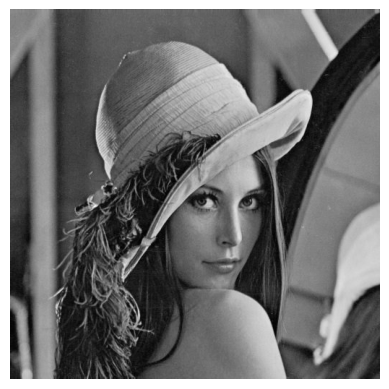

In [8]:
image = imread("images/Lena.jpg")
#image = to_gray(image)
show(image)

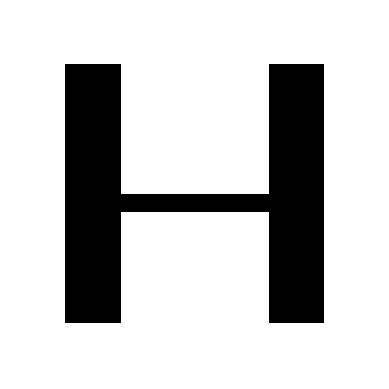

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1  1
1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  1  1 

In [9]:
waterMark = imread('images/H.jpg')
waterMark = to_gray(waterMark)
waterMark = np.around((waterMark / 255), 1)#.astype('int16')
show(waterMark)
printf(waterMark)

In [10]:
waterMark.shape

(20, 20)

In [11]:
M, N = image.shape
print(M, N)

512 512


In [12]:
div_rank = waterMark.shape[0]
div_rank

20

In [13]:
print(f"we have {int(M/div_rank)} * {int(N/div_rank)} numbers of blocks for hide watermark \nchoose one of them by getting X, y:")
X, y = 10, 13

we have 25 * 25 numbers of blocks for hide watermark 
choose one of them by getting X, y:


---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---
121  117   54    7   12   18   43  131  147  163  156  110   92   86   84   96  124  156  178  188
133  114   26    4    7   21   94  161  148  130  128  105   90   93  103  124  152  174  185  187
139   87    2    3   17   42  134  156  124   88   97   95   88  106  134  160  177  184  186  186
122   41   10   21   44   83  133  123   96   70   83   90  106  132  166  186  186  180  182  189
 86   14   46   64   77  118  101   97   88   72   81  107  147  163  183  193  188  180  182  190
 63   35   90  109  106  120   57   74   79   73   87  145  182  179  180  186  187  184  182  183
 75   86  124  124  122   99   37   65   78   91  106  170  186  178  175  180  185  183  180  180
101  125  142  117  124   83   46   77   97  125  129  171  175  174  177  184  184  180  179  184
104  123  106  121  109   77   55   92  142  160  138  171  173  177  180  179  176  175  176  179
 67   81  

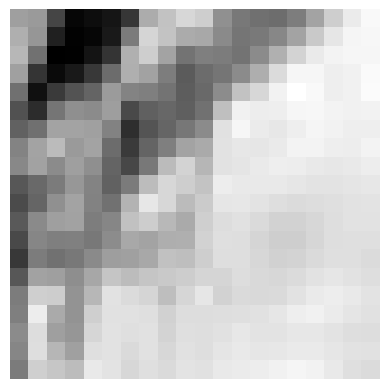

In [14]:
# taking block

p = image[X*div_rank:(X+1)*div_rank, y*div_rank:(y+1)*div_rank]
printf(p)
print(p.shape)
show(p)

In [15]:
U_host, s_host, VT_host = svd(p)
print_svd(svd(p))

=== U ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.2  -0.4   0.3  -0.5   0.1   0.4  -0.1  -0.3   0.1  -0.2  -0.2  -0.1  -0.2   0.2   0.1   0     0.1   0.2  -0     0.1
-0.2  -0.5   0.3  -0.2   0    -0     0.1  -0    -0.3   0.1   0.2   0.2   0.1  -0.1  -0.3  -0.1  -0.1  -0.5  -0    -0.3
-0.2  -0.5   0.1   0.2   0.1  -0.3   0.2   0.2  -0.2   0.1   0.1  -0.2   0.1  -0.1   0.1  -0     0     0.3   0.1   0.5
-0.2  -0.4  -0.2   0.4   0.1  -0.1  -0.1   0     0.3  -0    -0.3  -0.1  -0.1   0.2   0.2   0.1   0.1   0    -0.2  -0.5
-0.2  -0.2  -0.4   0.3  -0     0.2  -0.2  -0.3   0.2  -0.1  -0     0.2  -0.1  -0.1  -0.2  -0.1  -0.3  -0.2   0.3   0.3
-0.2  -0    -0.5   0.1   0     0.2  -0    -0.2  -0.4  -0.1   0.2   0     0.1   0    -0.1   0.1   0.5   0    -0.3   0.1
-0.2   0.1  -0.4  -0.2   0.2   0.1   0.2   0.1  -0.3   0    -0.1  -0.2   0     0.2   0.3  -0.1  -0.5   0     0.2  -0.2
-0.2   0.1  -0.3  -0.3   0.3  -0.2   0

In [16]:
U_waterMark, s_waterMark, VT_waterMark = svd(waterMark)
print_svd(svd(waterMark))

=== U ===
----  ----  --  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.2  -0.3  -0  -0.1  -0.4   0.3   0.7   0.2   0    -0     0     0    -0    -0     0     0    -0    -0    -0     0
-0.2  -0.3  -0   0.6   0.6   0.3   0    -0.1   0    -0     0     0     0     0     0     0     0     0    -0    -0
-0.2  -0.3  -0  -0.8   0.5   0.1  -0    -0.1   0    -0     0     0     0     0     0    -0     0     0    -0    -0
-0.2   0.2   0   0     0    -0     0    -0.1   0     0.3   0.8   0.5   0    -0     0     0     0    -0    -0     0
-0.2   0.2   0   0     0    -0     0    -0.1   0.1   0.9  -0.2  -0.3   0     0    -0    -0    -0    -0    -0     0
-0.2   0.2   0   0     0    -0     0    -0.1  -0     0    -0.6   0.7  -0    -0     0     0     0    -0    -0     0
-0.2   0.2   0   0     0    -0     0    -0.1  -0    -0.1  -0    -0.1   0.9   0    -0    -0    -0     0    -0     0
-0.2   0.2   0   0     0    -0     0    -0.1  -0    -0.1   0    -0.1

In [17]:
# take some alpha values
alpha_list = [(i + 1) * .1 for i in range(10)]
print(alpha_list)

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


In [18]:
# take 10 sigma matrix for making 10 image

sigma_list = []

for i in range(10):
    s = s_host.copy()
    s = s + alpha_list[i] * s_waterMark
    # printf(np.diag(s))
    sigma_list.append(s)

In [19]:
image_list = []
for i in range(10):
    new_image = image.copy().astype('float64')
    IMG_WaterMarked = product_svd(U_host, sigma_list[i], VT_host)
    new_image[X*div_rank:(X+1)*div_rank, y*div_rank:(y+1)*div_rank] = IMG_WaterMarked
    image_list.append(new_image)

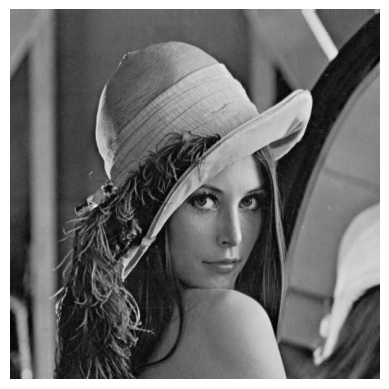

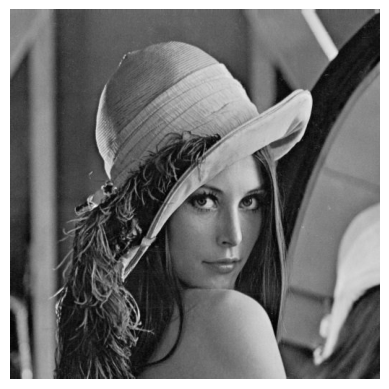

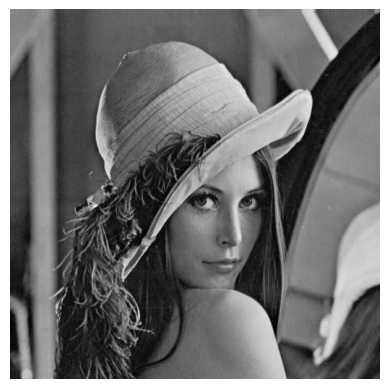

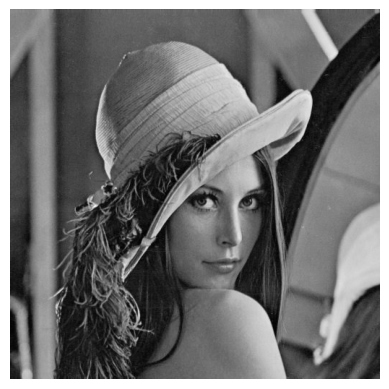

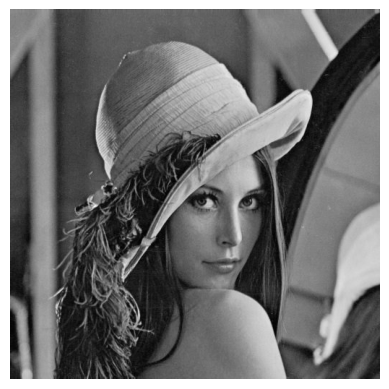

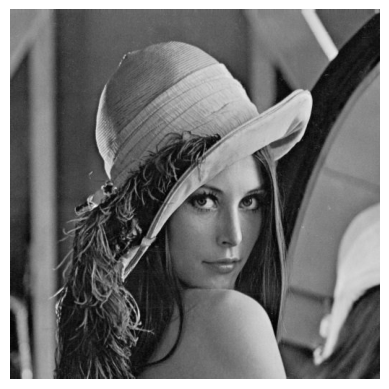

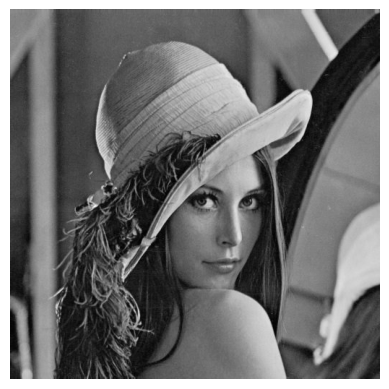

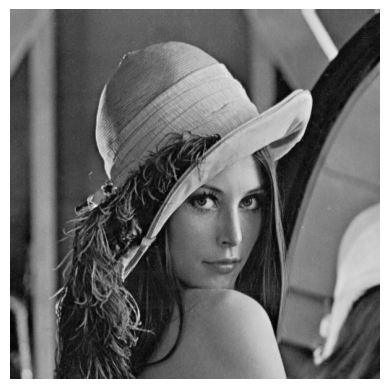

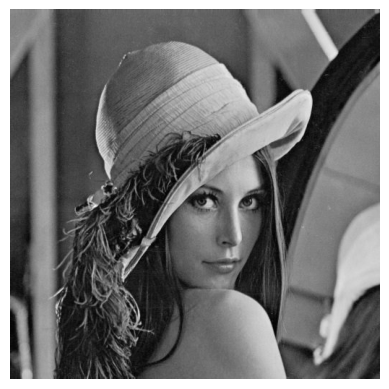

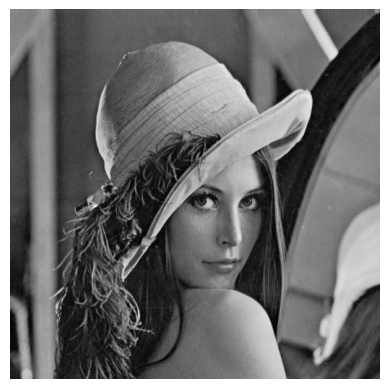

In [20]:
for i in range(10):
    show(image_list[i])

In [21]:
extracted_p = image_list[5][X*div_rank:(X+1)*div_rank, y*div_rank:(y+1)*div_rank]
U_ex, S_ex, VT_ex = svd(extracted_p)
S_ex = S_ex - s_host
S_ex = S_ex / .6
printf(np.diag(S_ex))

----  ---  ---  --  -  -  -  -  --  --  --  --  --  --  --  --  --  --  --  --
16.8  0    0     0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
 0    4.9  0     0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
 0    0    1.8   0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
 0    0    0    -0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
 0    0    0     0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
 0    0    0     0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
 0    0    0     0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
 0    0    0     0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
 0    0    0     0  0  0  0  0  -0   0   0   0   0   0   0   0   0   0   0   0
 0    0    0     0  0  0  0  0   0  -0   0   0   0   0   0   0   0   0   0   0
 0    0    0     0  0  0  0  0   0   0  -0   0   0   0   0   0   0   0   0   0
 0    0    0     0  0  0  0  0   0   0   0  -0   0  

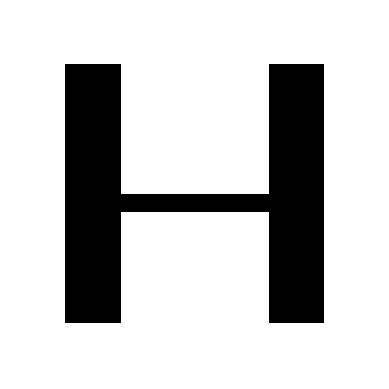

In [22]:
IMG_extracted = np.dot(U_waterMark, np.dot(np.diag(S_ex), VT_waterMark))
show(IMG_extracted)